In [ ]:
problems:
1-mixed format= Done
2-batchNorm,loss=DOne
3-No.steps=Done

# Import Library

In [111]:
#import cv2,os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os,shutil
import pickle
import keras
from keras_sequential_ascii import keras2ascii
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications import MobileNetV2,mobilenet_v2
import visualkeras
import matplotlib.image as mpimg
from matplotlib import image
from PIL import Image , ImageFont
from sklearn.model_selection import train_test_split


from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer

#import plotly.graph_objects as go
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow .keras.preprocessing.image import img_to_array,load_img

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input, ZeroPadding2D, Dropout,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score,f1_score, confusion_matrix
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19 

from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1

In [2]:
SEED=123
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Merge all folders from two dataset to a new folder directory
First of all, we upload a data set which is divided into three folders and each folders separated into two folders which are accidents and non accidents which contain an images. Afterthat, we see the number of images for the dataSet aren't engouh it's about 980 images.In this case we download another dataset that conatins about 3220 images to marge it with the first dataset. as shown below... 

In [ ]:
# Origin paths for accident folders
path_train_accident = './origin_train/Accident'
path_val_accident = './data/val/Accident'
path_Test_a0000 ccident = './data/test/Accident'
path_more_data_accident = './ACCIDENT_DATASET/Accident'
new_data_dir_accident= './NewData'

In [ ]:
# Origin paths for Non accident folders
path_train_NoAccident = './origin_train/Non Accident'
path_val_NoAccident = './data/val/Non Accident'
path_Test_NoAccident = './data/test/Non Accident'
path_more_data_NoAccident = './ACCIDENT_DATASET/No Accident'
new_data_dir_NoAccident= './NewData'

In [ ]:
imgs_val_accident = [file for file in os.listdir(path_val_accident) if file.endswith('.jpg')]
imgs_test_accident = [file for file in os.listdir(path_Test_accident) if file.endswith('.jpg')]
imgs_add_accident = [file for file in os.listdir(path_more_data_accident) if file.endswith('.jpg')]
imgs_train_accident = [file for file in os.listdir(path_train_accident) if file.endswith('.jpg')]


In [ ]:
imgs_val_NonAccident = [file for file in os.listdir(path_val_NoAccident) if file.endswith('.jpg')]
imgs_test_NonAccident = [file for file in os.listdir(path_Test_NoAccident) if file.endswith('.jpg')]
imgs_add_NonAccident = [file for file in os.listdir(path_more_data_NoAccident) if file.endswith('.jpg')]
imgs_train_NonAccident = [file for file in os.listdir(path_train_NoAccident) if file.endswith('.jpg')]

In [ ]:
print('There are',len(imgs_add_accident), 'validation set accident images')

In [ ]:
os.mkdir(new_data_dir_accident)
os.mkdir(new_data_dir_NoAccident)

In [ ]:
new_folder_accident = os.path.join(new_data_dir, 'accident')

In [ ]:
new_folder_NonAccident = os.path.join(new_data_dir, 'non accident')

In [ ]:
new_folder_accident

In [ ]:
new_folder_NonAccident

In [ ]:
os.mkdir(new_folder_accident)

In [ ]:
os.mkdir(new_folder_NonAccident)

In [ ]:
# merge all accidents's folders to a new one accident folder 
imgs = imgs_train_accident[:5000]
for img in imgs:
    origin = os.path.join(path_train_accident, img)
    destination = os.path.join(new_folder_accident, img)
    shutil.copyfile(origin, destination)

In [ ]:
imgs = imgs_val_accident[:5000]
for img in imgs:
    origin = os.path.join(path_val_accident, img)
    destination = os.path.join(new_folder_accident, img)
    shutil.copyfile(origin, destination)
  

In [ ]:
imgs = imgs_test_accident[:5000]
for img in imgs:
    origin = os.path.join(path_Test_accident, img)
    destination = os.path.join(new_folder_accident, img)
    shutil.copyfile(origin, destination)

In [ ]:
imgs = imgs_add_accident[:5000]
for img in imgs:
    origin = os.path.join(path_more_dat_accident, img)
    destination = os.path.join(new_folder_accident, img)
    shutil.copyfile(origin, destination)

In [ ]:
# merge all non accidents's folders to a new one non accident folder 
imgs = imgs_train_NonAccident[:5000]
for img in imgs:
    origin = os.path.join(path_train_NoAccident, img)
    destination = os.path.join(new_folder_NonAccident, img)
    shutil.copyfile(origin, destination)

In [ ]:
imgs = imgs_val_NonAccident[:5000]
for img in imgs:
    origin = os.path.join(path_val_NoAccident, img)
    destination = os.path.join(new_folder_NonAccident, img)
    shutil.copyfile(origin, destination)

In [ ]:
imgs = imgs_test_NonAccident[:5000]
for img in imgs:
    origin = os.path.join(path_Test_NoAccident, img)
    destination = os.path.join(new_folder_NonAccident, img)
    shutil.copyfile(origin, destination)

In [ ]:
imgs = imgs_add_NonAccident[:5000]
for img in imgs:
    origin = os.path.join(path_more_data_NoAccident, img)
    destination = os.path.join(new_folder_NonAccident, img)
    shutil.copyfile(origin, destination)

# Visualize the 2 classes (Accidents & Non Accidents) 

In [3]:
# Read all accident images that in training set
list_images_accident = []
name_accident= []
for dirname, _, filenames in os.walk('./NewData/accident'):
    for filename in filenames:
        list_images_accident.append(os.path.join(dirname, filename))
        name_accident.append(filename)
list_images_accident

['./NewData/accident\\acc1 (1).jpg',
 './NewData/accident\\acc1 (13).jpg',
 './NewData/accident\\acc1 (14).jpg',
 './NewData/accident\\acc1 (15).jpg',
 './NewData/accident\\acc1 (2).jpg',
 './NewData/accident\\acc1 (3).jpg',
 './NewData/accident\\acc1 (4).jpg',
 './NewData/accident\\acc1 (5).jpg',
 './NewData/accident\\acc1 (6).jpg',
 './NewData/accident\\acc1 (7).jpg',
 './NewData/accident\\accident (1).jpg',
 './NewData/accident\\accident (10).jpg',
 './NewData/accident\\accident (100).jpg',
 './NewData/accident\\accident (1000).jpg',
 './NewData/accident\\accident (1001).jpg',
 './NewData/accident\\accident (1002).jpg',
 './NewData/accident\\accident (1003).jpg',
 './NewData/accident\\accident (1004).jpg',
 './NewData/accident\\accident (1005).jpg',
 './NewData/accident\\accident (1006).jpg',
 './NewData/accident\\accident (1007).jpg',
 './NewData/accident\\accident (1008).jpg',
 './NewData/accident\\accident (1009).jpg',
 './NewData/accident\\accident (101).jpg',
 './NewData/accide

# Pickle.dump() Method In Python
### Method Signature:
##### pickle.dump(pythonObject, pickleDestination, pickle_protocol=None, *, fix_imports=True)
* The dump() method of the pickle module in Python, converts a Python object hierarchy into a byte stream.This process is also called as serilaization.
* The converted byte stream can be written to a buffer or to a disk file.
* The byte stream of a pickled Python object can converted back to a Python object using the pickle.load() method.

In [4]:
open_file = open("list_images_accident.txt", "wb")
pickle.dump(list_images_accident, open_file)
open_file.close()

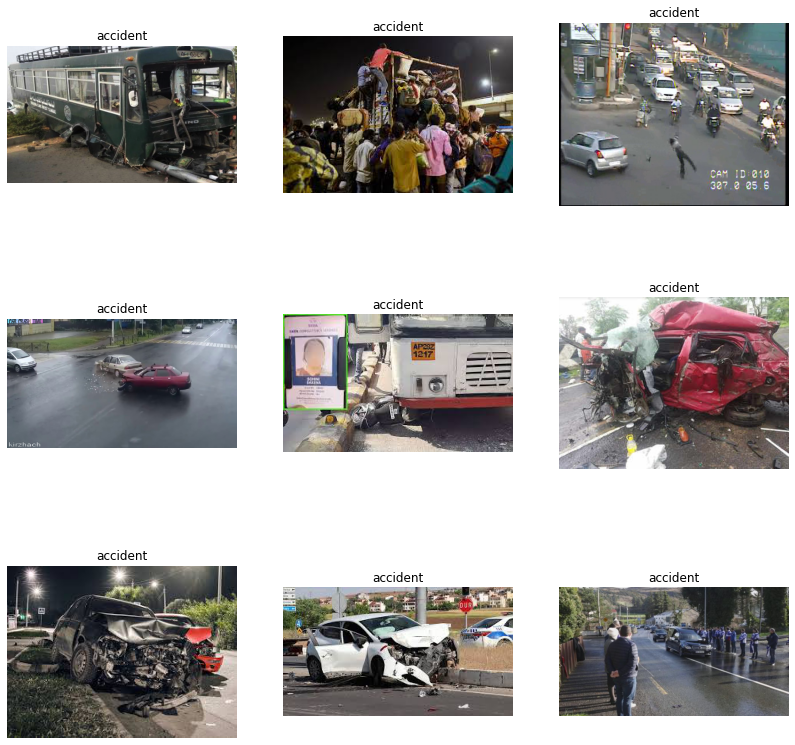

In [104]:
with open("list_images_accident.txt", "rb") as fp:
    accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(accident[ran_num[i]]))
    plt.title("accident")
    plt.axis("off")

In [6]:
df_images_accident = pd.DataFrame()
df_images_accident["File_Name"] = name_accident
df_images_accident["Class"] = "accident"
df_images_accident

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
2100,test_41.jpg,accident
2101,test_42.jpg,accident
2102,test_43.jpg,accident
2103,test_44.jpg,accident


In [7]:
# Read all accident images that in training set
list_images_no_accident = []
name_no_accident= []
for dirname_2, _, filenames_2 in os.walk('./NewData/non accident'):
    for filename in filenames_2:
        list_images_no_accident.append(os.path.join(dirname_2, filename))
        name_no_accident.append(filename)
list_images_no_accident

['./NewData/non accident\\5_10.jpg',
 './NewData/non accident\\5_11.jpg',
 './NewData/non accident\\5_12.jpg',
 './NewData/non accident\\5_13.jpg',
 './NewData/non accident\\5_14.jpg',
 './NewData/non accident\\5_15.jpg',
 './NewData/non accident\\5_16.jpg',
 './NewData/non accident\\5_17.jpg',
 './NewData/non accident\\5_22.jpg',
 './NewData/non accident\\5_23.jpg',
 './NewData/non accident\\5_24.jpg',
 './NewData/non accident\\5_25.jpg',
 './NewData/non accident\\5_26.jpg',
 './NewData/non accident\\5_27.jpg',
 './NewData/non accident\\5_28.jpg',
 './NewData/non accident\\5_29.jpg',
 './NewData/non accident\\5_30.jpg',
 './NewData/non accident\\5_5.jpg',
 './NewData/non accident\\5_6.jpg',
 './NewData/non accident\\5_7.jpg',
 './NewData/non accident\\5_8.jpg',
 './NewData/non accident\\5_9.jpg',
 './NewData/non accident\\no_accident (1).jpg',
 './NewData/non accident\\no_accident (10).jpg',
 './NewData/non accident\\no_accident (100).jpg',
 './NewData/non accident\\no_accident (1000)

In [8]:
open_file = open("list_images_no_accident.txt", "wb")
pickle.dump(list_images_no_accident, open_file)
open_file.close()

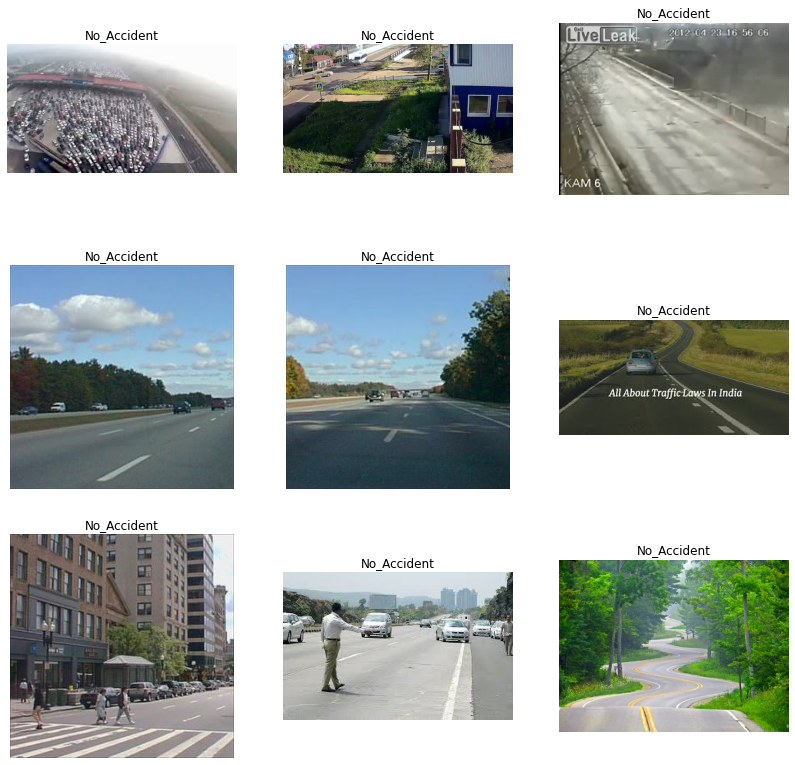

In [9]:
with open("list_images_no_accident.txt", "rb") as fp: 
    no_accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(no_accident[ran_num[i]]))
    plt.title("No_Accident")
    plt.axis("off")

In [10]:
df_images_no_accident = pd.DataFrame()
df_images_no_accident["File_Name"] = name_no_accident
df_images_no_accident["Class"] = "No_Accident"
df_images_no_accident

,File_Name,Class
0,5_10.jpg,No_Accident
1,5_11.jpg,No_Accident
2,5_12.jpg,No_Accident
3,5_13.jpg,No_Accident
4,5_14.jpg,No_Accident
...,...,...
2022,test_5.jpg,No_Accident
2023,test_6.jpg,No_Accident
2024,test_7.jpg,No_Accident
2025,test_8.jpg,No_Accident


In [11]:
df_all_images = pd.concat([df_images_accident, df_images_no_accident], ignore_index=True)
df_all_images

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
4127,test_5.jpg,No_Accident
4128,test_6.jpg,No_Accident
4129,test_7.jpg,No_Accident
4130,test_8.jpg,No_Accident


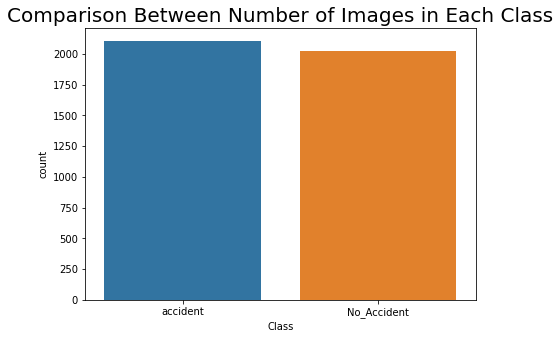

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Class", data = df_all_images)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

# Prepare Images for Modeling

In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    x = image.img_to_array(img)
    return x

In [ ]:
images = []
labels = []

directory = os.fsencode('./NewData')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'.//NewData/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'.//NewData/{label}/{img_name}'))
        labels.append(label)

In [ ]:
label_0_1 = [int(labels[w].replace('non accident', "0").replace("accident",'1')) for w in range(len(labels))]
label_0_1

In [ ]:
len(label_0_1)

In [ ]:
X, Y = images, label_0_1

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
open_file = open("img_150x150.txt", "wb")#.h5
pickle.dump(X, open_file)
open_file.close()

In [ ]:
open_file = open("label_150x150.txt", "wb")
pickle.dump(Y, open_file)
open_file.close()

In [4]:
with open("img_150x150.txt", "rb") as fp: 
    x = pickle.load(fp)

In [5]:
with open("label_150x150.txt", "rb") as fp: 
    y= pickle.load(fp)

# Split The Data

In [6]:
# Split the data sets
x_train_val, x_test, y_train_val, y_test = (train_test_split(x, y, test_size = .1, random_state = 42))
x_train, x_val, y_train, y_val = (train_test_split(x_train_val, y_train_val, test_size = .111, random_state = 42))

In [7]:
# Checking the shapes of the datasets
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_val = x_val.shape[0]
m_test = x_test.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

Number of training samples: 3305
Number of validation samples: 413
Number of testing samples: 414
train_images shape: (3305, 128, 128, 3)
train_labels shape: (3305,)
val_images shape: (413, 128, 128, 3)
val_labels shape: (413,)
test_images shape: (414, 128, 128, 3)
test_labels shape: (414,)


# Experiment0: Build Simple Neural Network Model - NN

Epoch 1/10
93/93 [==============================] - 10s 102ms/step - loss: 1132.7936 - accuracy: 0.5562 - val_loss: 64.1374 - val_accuracy: 0.5801
Epoch 2/10
93/93 [==============================] - 10s 104ms/step - loss: 53.9547 - accuracy: 0.6274 - val_loss: 29.6138 - val_accuracy: 0.6647
Epoch 3/10
93/93 [==============================] - 10s 104ms/step - loss: 62.1538 - accuracy: 0.6130 - val_loss: 34.7245 - val_accuracy: 0.6979
Epoch 4/10
93/93 [==============================] - 10s 104ms/step - loss: 40.8366 - accuracy: 0.6671 - val_loss: 52.2719 - val_accuracy: 0.5891
Epoch 5/10
93/93 [==============================] - 10s 113ms/step - loss: 41.1785 - accuracy: 0.6590 - val_loss: 40.2516 - val_accuracy: 0.6284
Epoch 6/10
93/93 [==============================] - 10s 103ms/step - loss: 20.1966 - accuracy: 0.7243 - val_loss: 23.1535 - val_accuracy: 0.6375
Epoch 7/10
93/93 [==============================] - 10s 105ms/step - loss: 10.3055 - accuracy: 0.7579 - val_loss: 14.6923 - val_

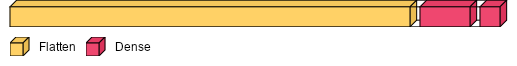

In [23]:
NN_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_1_model = NN_1.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.1)

predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_1, legend=True, font=font)

In [24]:
keras2ascii(NN_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500   100.0%
                relu   #####         500
               Dense   XXXXX -------------------       501     0.0%
             sigmoid   #####           1


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 49152)             0         
                                                                 
 dense_16 (Dense)            (None, 512)               25166336  
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 25,330,689
Trainable params: 25,330,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
93/93 [========================

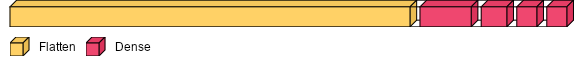

In [26]:
NN_2_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(512, activation='relu'),
                         Dense(256, activation='relu'),
                         Dense(128, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_2_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_2_1.summary()

NN_2_1_model = NN_2_1.fit(x_train, y_train, epochs=10, validation_split=0.1,batch_size=32)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_2_1, legend=True, font=font)

In [27]:
keras2ascii(NN_2_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  25166336    99.4%
                relu   #####         512
               Dense   XXXXX -------------------    131328     0.5%
                relu   #####         256
               Dense   XXXXX -------------------     32896     0.1%
                relu   #####         128
               Dense   XXXXX -------------------       129     0.0%
             sigmoid   #####           1


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 49152)             0         
                                                                 
 dense_20 (Dense)            (None, 1500)              73729500  
                                                                 
 dense_21 (Dense)            (None, 1)                 1501      
                                                                 
Total params: 73,731,001
Trainable params: 73,731,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
104/104 [==============================] - 33s 315ms/step - loss: 1368.9653 - accuracy: 0.5416 - val_loss: 327.3436 - val_accuracy: 0.5061
Epoch 2/10
104/104 [==============================] - 32s 305ms/step - loss: 194.4840 - accuracy: 0.5918 - val_loss: 70.2713 - val_accuracy: 0.6731
Epoch 3/

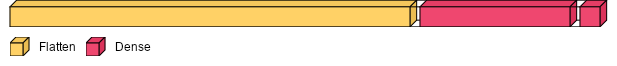

In [28]:
NN_2_2 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(1500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_2_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_2_2.summary()

NN_2_2_model = NN_2_2.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=32)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_2_2, legend=True, font=font)

In [29]:
keras2ascii(NN_2_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  73729500   100.0%
                relu   #####        1500
               Dense   XXXXX -------------------      1501     0.0%
             sigmoid   #####           1


# Try adding more layers to NN

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 49152)             0         
                                                                 
 dense_22 (Dense)            (None, 1000)              49153000  
                                                                 
 dense_23 (Dense)            (None, 500)               500500    
                                                                 
 dense_24 (Dense)            (None, 250)               125250    
                                                                 
 dense_25 (Dense)            (None, 125)               31375     
                                                                 
 dense_26 (Dense)            (None, 85)                10710     
                                                                 
 dense_27 (Dense)            (None, 1)                

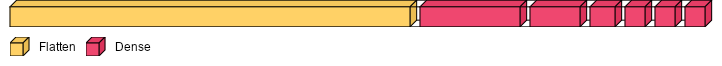

In [30]:
NN_3 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                   
                         Dense(1000, activation='relu'),
                         Dense(500, activation='relu'),
                         Dense(250, activation='relu'),
                         Dense(125, activation='relu'),
                         Dense(85, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_3.summary()
NN_3_model =  NN_3.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=32)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_3, legend=True, font=font)

In [31]:
keras2ascii(NN_3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  49153000    98.7%
                relu   #####        1000
               Dense   XXXXX -------------------    500500     1.0%
                relu   #####         500
               Dense   XXXXX -------------------    125250     0.3%
                relu   #####         250
               Dense   XXXXX -------------------     31375     0.1%
                relu   #####         125
               Dense   XXXXX -------------------     10710     0.0%
                relu   #####          85
               Dense   XXXXX -------------------        86     0.0%
             sigmoid   #####           1


Due to the above results and the scores batween training and validation about (60 and 70), we're jumping to the next step and trying using another model to reach to better scores

# Experiment1: Build Second Neural Network Model - Convolutional Neural Networks(CNN)

In [32]:
CNN_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(1, activation='sigmoid')])

CNN_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 32768)             0         
                                                                 
 dense_28 (Dense)            (None, 500)             

In [33]:
CNN_1_model =  CNN_1.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=32)

Epoch 1/10
104/104 [==============================] - 37s 345ms/step - loss: 52.2879 - accuracy: 0.6415 - val_loss: 0.5986 - val_accuracy: 0.6828
Epoch 2/10
104/104 [==============================] - 36s 347ms/step - loss: 0.4908 - accuracy: 0.7628 - val_loss: 0.5884 - val_accuracy: 0.6901
Epoch 3/10
104/104 [==============================] - 38s 367ms/step - loss: 0.3650 - accuracy: 0.8363 - val_loss: 0.7069 - val_accuracy: 0.7167
Epoch 4/10
104/104 [==============================] - 42s 406ms/step - loss: 0.2754 - accuracy: 0.8808 - val_loss: 0.6391 - val_accuracy: 0.7288
Epoch 5/10
104/104 [==============================] - 39s 376ms/step - loss: 0.2460 - accuracy: 0.8989 - val_loss: 0.7661 - val_accuracy: 0.7167
Epoch 6/10
104/104 [==============================] - 36s 347ms/step - loss: 0.1711 - accuracy: 0.9292 - val_loss: 0.9798 - val_accuracy: 0.7385
Epoch 7/10
104/104 [==============================] - 36s 349ms/step - loss: 0.1316 - accuracy: 0.9477 - val_loss: 1.0770 - val_a

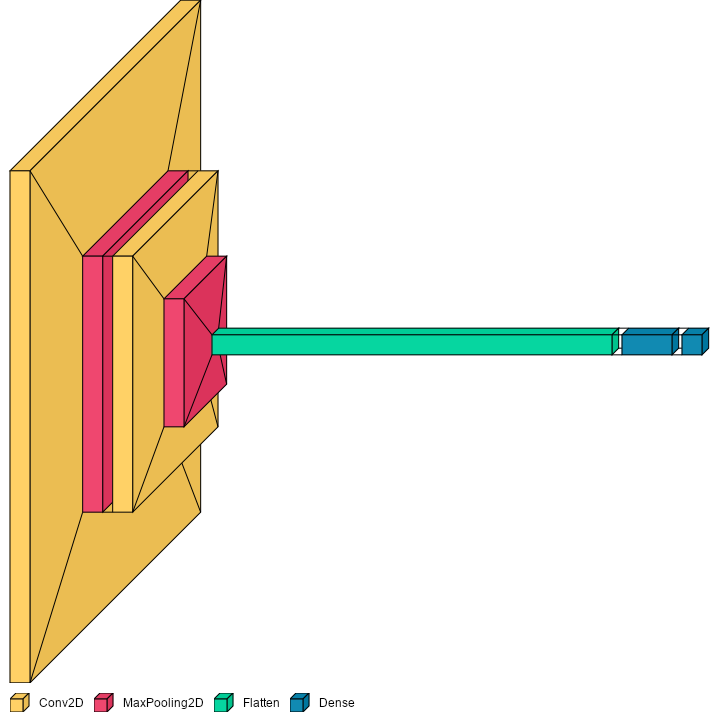

In [46]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_1, legend=True, font=font)

In [47]:
keras2ascii(CNN_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.1%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       32768
               Dense   XXXXX -------------------  16384500    99.9%
                relu   #####         500
               Dense   XXXXX -------------------       501     0.0%
             sigmoid   #####           1


Epoch 1/15
104/104 [==============================] - 50s 485ms/step - loss: 0.7326 - accuracy: 0.6027 - val_loss: 0.5894 - val_accuracy: 0.6925
Epoch 2/15
104/104 [==============================] - 50s 485ms/step - loss: 0.5330 - accuracy: 0.7259 - val_loss: 0.5136 - val_accuracy: 0.7433
Epoch 3/15
104/104 [==============================] - 50s 482ms/step - loss: 0.4296 - accuracy: 0.7939 - val_loss: 0.4284 - val_accuracy: 0.8160
Epoch 4/15
104/104 [==============================] - 50s 477ms/step - loss: 0.3509 - accuracy: 0.8481 - val_loss: 0.5276 - val_accuracy: 0.7797
Epoch 5/15
104/104 [==============================] - 49s 467ms/step - loss: 0.2453 - accuracy: 0.8926 - val_loss: 0.4597 - val_accuracy: 0.8111
Epoch 6/15
104/104 [==============================] - 49s 473ms/step - loss: 0.1667 - accuracy: 0.9343 - val_loss: 0.5079 - val_accuracy: 0.8160
Epoch 7/15
104/104 [==============================] - 48s 460ms/step - loss: 0.1308 - accuracy: 0.9534 - val_loss: 0.4985 - val_ac

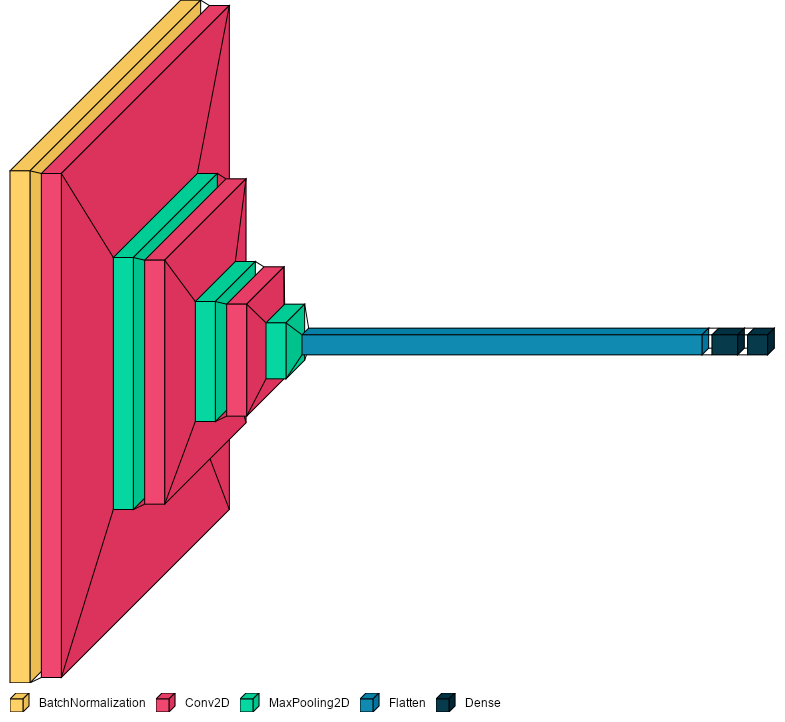

In [50]:
## Defining Cnn
CNN_2 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense(1, activation= 'sigmoid') #Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
CNN_2.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              steps_per_execution = 50,
              loss='binary_crossentropy', metrics=['accuracy'])
CNN_2_model = CNN_2.fit(x_train, y_train, epochs=15,validation_data=(x_val,y_val),batch_size=32)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_2, legend=True, font=font)

In [51]:
CNN_2.summary()
keras2ascii(CNN_2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                     

In [53]:
CNN_3 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(600, activation='relu'),
                     Dense(1, activation='sigmoid')])

CNN_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_3.summary()
keras2ascii(CNN_3)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)     

Epoch 1/10
52/52 [==============================] - 43s 817ms/step - loss: 9.2722 - accuracy: 0.5746 - val_loss: 0.6410 - val_accuracy: 0.6295
Epoch 2/10
52/52 [==============================] - 44s 847ms/step - loss: 0.6169 - accuracy: 0.6602 - val_loss: 0.6022 - val_accuracy: 0.6755
Epoch 3/10
52/52 [==============================] - 44s 850ms/step - loss: 0.5610 - accuracy: 0.7129 - val_loss: 0.6232 - val_accuracy: 0.6562
Epoch 4/10
52/52 [==============================] - 44s 850ms/step - loss: 0.5081 - accuracy: 0.7455 - val_loss: 0.6915 - val_accuracy: 0.6780
Epoch 5/10
52/52 [==============================] - 46s 887ms/step - loss: 0.4744 - accuracy: 0.7640 - val_loss: 0.5658 - val_accuracy: 0.7215
Epoch 6/10
52/52 [==============================] - 44s 848ms/step - loss: 0.4184 - accuracy: 0.8064 - val_loss: 0.5855 - val_accuracy: 0.6925
Epoch 7/10
52/52 [==============================] - 44s 854ms/step - loss: 0.3556 - accuracy: 0.8463 - val_loss: 0.5777 - val_accuracy: 0.7458

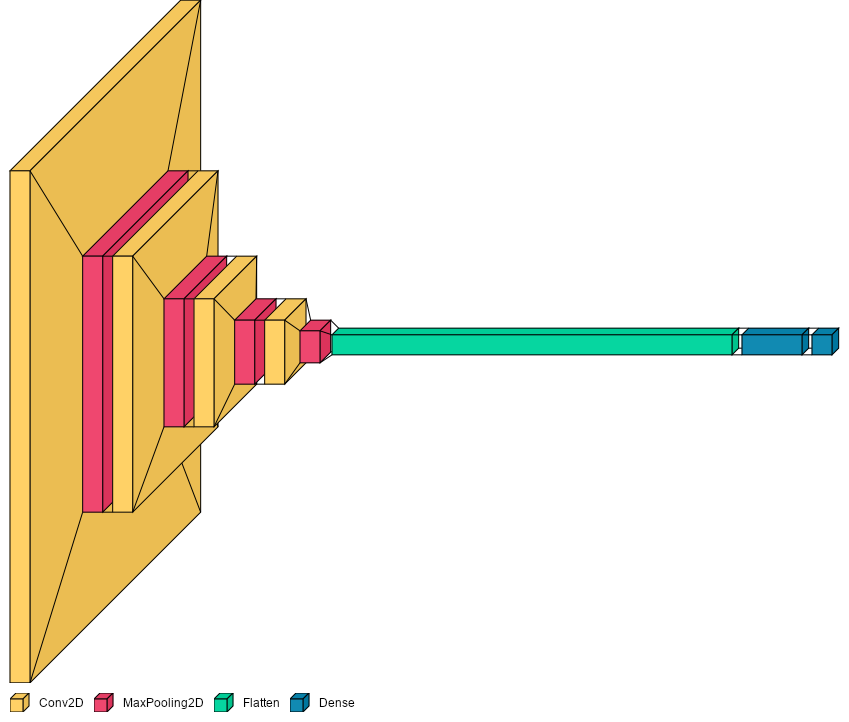

In [54]:
CNN_3_model = CNN_3.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=64, callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_3, legend=True, font=font)

- upgrade CNN

* Dropout(.05): only 5 %
* ReduceLROnPlateau
* EarlyStopping
* optimizer > Adagrad

In [65]:
CNN_4 = Sequential()

CNN_4.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_4.add(Conv2D(32, 3, activation='relu'))    
CNN_4.add(MaxPooling2D())

CNN_4.add(Conv2D(64, 3, activation='relu'))   
CNN_4.add(MaxPooling2D())

CNN_4.add(Conv2D(128, 3, activation='relu'))    
CNN_4.add(MaxPooling2D())

CNN_4.add(Flatten())
CNN_4.add(Dense(512, activation='relu')) 
CNN_4.add(Dropout(.02))   # replace 0.05
CNN_4.add(Dense(1 , activation = 'sigmoid'))  

CNN_4.compile(optimizer='Adagrad',loss="binary_crossentropy",metrics=['accuracy'])
# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

CNN_4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 128)    

In [66]:
callbacks=[
        keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
    ]
history_1= CNN_4.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val,y_val), callbacks=[callbacks])

Epoch 1/10
52/52 [==============================] - 50s 963ms/step - loss: 30.6822 - accuracy: 0.5295 - val_loss: 0.7453 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 40s 769ms/step - loss: 0.7709 - accuracy: 0.6475 - val_loss: 0.6246 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 42s 804ms/step - loss: 0.6166 - accuracy: 0.6986 - val_loss: 0.5793 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - 40s 778ms/step - loss: 0.5181 - accuracy: 0.7513 - val_loss: 0.7209 - val_accuracy: 0.6513 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 41s 784ms/step - loss: 0.4654 - accuracy: 0.7761 - val_loss: 0.5438 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 6/10
52/52 [==============================] - 41s 791ms/step - loss: 0.4222 - accuracy: 0.8106 - val_loss: 0.5217 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 7/10
52/52 [==============================] - 41s 795ms/s

In [67]:
CNN_5 = Sequential()

CNN_5.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_5.add(Conv2D(32, 3, activation='relu'))   
CNN_5.add(MaxPooling2D())

CNN_5.add(Conv2D(64, 3, activation='relu'))   
CNN_5.add(MaxPooling2D())

CNN_5.add(Conv2D(128, 3, activation='relu'))    
CNN_5.add(MaxPooling2D())

CNN_5.add(Conv2D(512, 3, activation='relu'))    
CNN_5.add(MaxPooling2D())


CNN_5.add(Flatten())
CNN_5.add(Dense(128, activation='relu')) #replace 512-CNN_4
#CNN_5.add(Dropout(.05))   # replace 0.20
CNN_5.add(Dense(1, activation = 'sigmoid'))  

CNN_5.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 128)    

Epoch 1/10
52/52 [==============================] - 49s 934ms/step - loss: 10.8454 - accuracy: 0.5543 - val_loss: 0.6687 - val_accuracy: 0.5666
Epoch 2/10
52/52 [==============================] - 53s 1s/step - loss: 0.6329 - accuracy: 0.6378 - val_loss: 0.6163 - val_accuracy: 0.6586
Epoch 3/10
52/52 [==============================] - 51s 979ms/step - loss: 0.5724 - accuracy: 0.7074 - val_loss: 0.5989 - val_accuracy: 0.6780
Epoch 4/10
52/52 [==============================] - 50s 968ms/step - loss: 0.5069 - accuracy: 0.7522 - val_loss: 0.5918 - val_accuracy: 0.6901
Epoch 5/10
52/52 [==============================] - 51s 984ms/step - loss: 0.4635 - accuracy: 0.7758 - val_loss: 0.5600 - val_accuracy: 0.7143
Epoch 6/10
52/52 [==============================] - 51s 980ms/step - loss: 0.4259 - accuracy: 0.7952 - val_loss: 0.6735 - val_accuracy: 0.7070
Epoch 7/10
52/52 [==============================] - 51s 972ms/step - loss: 0.3767 - accuracy: 0.8290 - val_loss: 0.5607 - val_accuracy: 0.7312
E

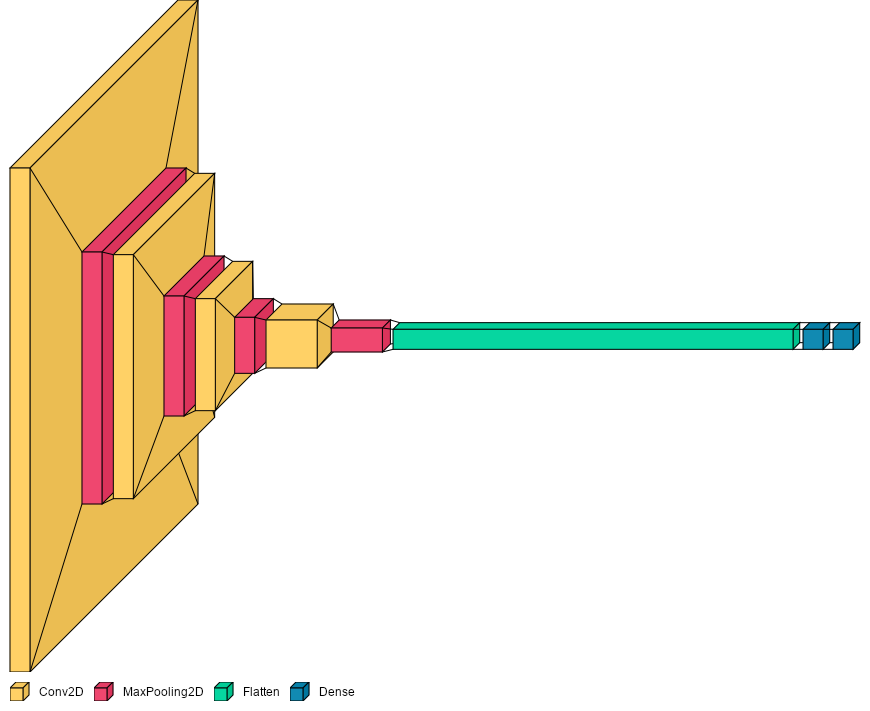

In [68]:
CNN_5_model = CNN_5.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=64)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_5, legend=True, font=font)

In [ ]:
CNN_5.save("CNN_5_model")

In [69]:
CNN_6 = Sequential()

CNN_6.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_6.add(Conv2D(32, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
CNN_6.add(MaxPooling2D())

CNN_6.add(Conv2D(64, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))   
CNN_6.add(MaxPooling2D())

CNN_6.add(Conv2D(128, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
CNN_6.add(MaxPooling2D())

CNN_6.add(Conv2D(512, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
CNN_6.add(MaxPooling2D())

CNN_6.add(Flatten())
CNN_6.add(Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))     
CNN_6.add(Dense(1 , activation = 'sigmoid'))  

CNN_6.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_6.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 128)    

Epoch 1/10
52/52 [==============================] - 57s 1s/step - loss: 9.5497 - accuracy: 0.5356 - val_loss: 1.6509 - val_accuracy: 0.5569
Epoch 2/10
52/52 [==============================] - 65s 1s/step - loss: 1.5911 - accuracy: 0.5558 - val_loss: 1.5218 - val_accuracy: 0.5157
Epoch 3/10
52/52 [==============================] - 63s 1s/step - loss: 1.4461 - accuracy: 0.6033 - val_loss: 1.4007 - val_accuracy: 0.5908
Epoch 4/10
52/52 [==============================] - 63s 1s/step - loss: 1.3582 - accuracy: 0.6169 - val_loss: 1.6084 - val_accuracy: 0.5254
Epoch 5/10
52/52 [==============================] - 64s 1s/step - loss: 1.2437 - accuracy: 0.6726 - val_loss: 1.2137 - val_accuracy: 0.7070
Epoch 6/10
52/52 [==============================] - 65s 1s/step - loss: 1.1397 - accuracy: 0.7241 - val_loss: 1.1726 - val_accuracy: 0.6973
Epoch 7/10
52/52 [==============================] - 63s 1s/step - loss: 1.0883 - accuracy: 0.7289 - val_loss: 1.1565 - val_accuracy: 0.6731
Epoch 8/10
52/52 [==

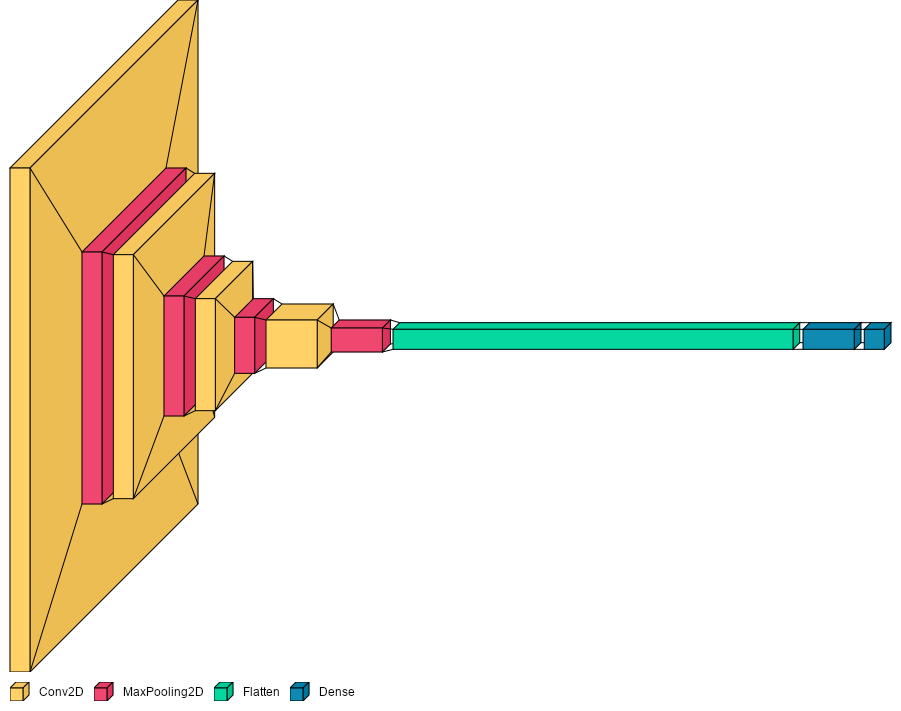

In [70]:
CNN_6_model = CNN_6.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=64)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_6, legend=True, font=font)

In [71]:
CNN_7 = Sequential()

CNN_7.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_7.add(Conv2D(32, 3, activation='relu'))   
CNN_7.add(MaxPooling2D())

CNN_7.add(Conv2D(64, 3, activation='relu'))   
CNN_7.add(MaxPooling2D())

CNN_7.add(Conv2D(128, 3, activation='relu'))    
CNN_7.add(MaxPooling2D())

CNN_7.add(Conv2D(256, 3, activation='relu'))    
CNN_7.add(MaxPooling2D())

CNN_7.add(Conv2D(512, 3, activation='relu'))    
CNN_7.add(MaxPooling2D())


CNN_7.add(Flatten())
CNN_7.add(Dense(128, activation='relu')) #256-CNN_2
CNN_7.add(Dense(256, activation='relu')) 
CNN_7.add(Dense(1, activation = 'sigmoid'))  

CNN_7.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_7.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 128)    

Epoch 1/10
52/52 [==============================] - 56s 1s/step - loss: 1.9821 - accuracy: 0.5449 - val_loss: 0.7001 - val_accuracy: 0.5545
Epoch 2/10
52/52 [==============================] - 55s 1s/step - loss: 0.6522 - accuracy: 0.6097 - val_loss: 0.6566 - val_accuracy: 0.6513
Epoch 3/10
52/52 [==============================] - 60s 1s/step - loss: 0.6175 - accuracy: 0.6581 - val_loss: 0.6168 - val_accuracy: 0.6416
Epoch 4/10
52/52 [==============================] - 61s 1s/step - loss: 0.5532 - accuracy: 0.7144 - val_loss: 0.5928 - val_accuracy: 0.7046
Epoch 5/10
52/52 [==============================] - 56s 1s/step - loss: 0.4858 - accuracy: 0.7543 - val_loss: 0.5523 - val_accuracy: 0.7167
Epoch 6/10
52/52 [==============================] - 59s 1s/step - loss: 0.4541 - accuracy: 0.7849 - val_loss: 0.4959 - val_accuracy: 0.7748
Epoch 7/10
52/52 [==============================] - 58s 1s/step - loss: 0.3905 - accuracy: 0.8157 - val_loss: 0.4646 - val_accuracy: 0.7821
Epoch 8/10
52/52 [==

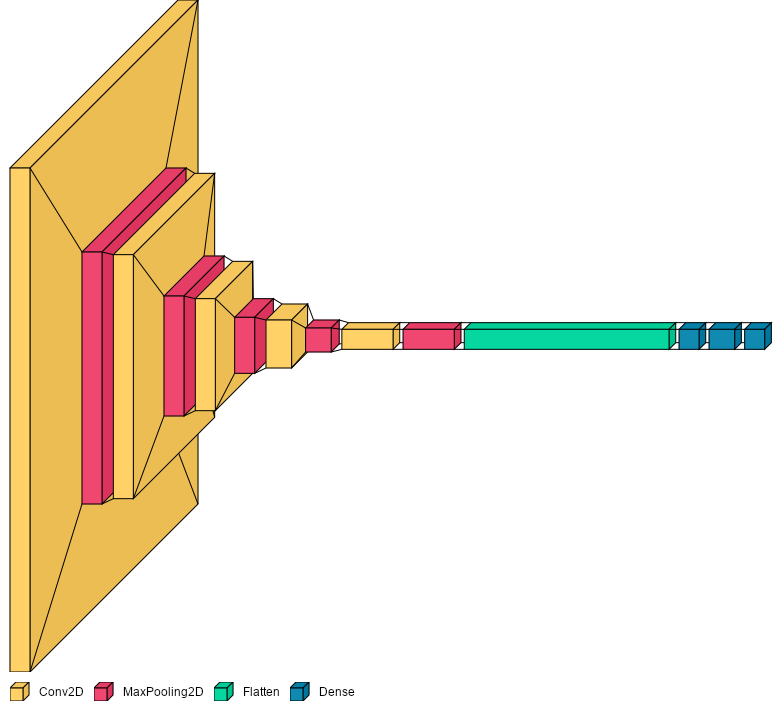

In [72]:
CNN_7_model = CNN_7.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val),batch_size=64)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_7, legend=True, font=font)

In [73]:
CNN_8 = Sequential()

CNN_8.add(InputLayer(input_shape=x_train.shape[1:]))

CNN_8.add(Conv2D(32, 3, activation='relu'))   
CNN_8.add(MaxPooling2D())

CNN_8.add(Conv2D(64, 3, activation='relu'))   
CNN_8.add(MaxPooling2D())

CNN_8.add(Conv2D(128, 3, activation='relu'))    
CNN_8.add(MaxPooling2D())

CNN_8.add(Conv2D(512, 3, activation='relu'))    
CNN_8.add(MaxPooling2D())

CNN_8.add(Conv2D(1024, 3, activation='relu'))    
CNN_8.add(MaxPooling2D())


CNN_8.add(Flatten())
CNN_8.add(Dense(600, activation='relu')) #256-CNN_2
CNN_8.add(Dense(300, activation='relu')) 
CNN_8.add(Dense(1, activation = 'sigmoid'))  

CNN_8.compile(optimizer='adam', 
                loss="binary_crossentropy", 
                metrics=['accuracy'])
CNN_8.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 128)    

Epoch 1/20
52/52 [==============================] - 80s 2s/step - loss: 7.7635 - accuracy: 0.5443 - val_loss: 0.6734 - val_accuracy: 0.5763
Epoch 2/20
52/52 [==============================] - 84s 2s/step - loss: 0.6616 - accuracy: 0.6203 - val_loss: 0.6384 - val_accuracy: 0.6005
Epoch 3/20
52/52 [==============================] - 89s 2s/step - loss: 0.6235 - accuracy: 0.6517 - val_loss: 0.6807 - val_accuracy: 0.5981
Epoch 4/20
52/52 [==============================] - 79s 2s/step - loss: 0.5637 - accuracy: 0.7107 - val_loss: 0.5336 - val_accuracy: 0.7409
Epoch 5/20
52/52 [==============================] - 81s 2s/step - loss: 0.5080 - accuracy: 0.7537 - val_loss: 0.5168 - val_accuracy: 0.7530
Epoch 6/20
52/52 [==============================] - 88s 2s/step - loss: 0.4443 - accuracy: 0.7924 - val_loss: 0.5493 - val_accuracy: 0.7361
Epoch 7/20
52/52 [==============================] - 83s 2s/step - loss: 0.3661 - accuracy: 0.8348 - val_loss: 0.6670 - val_accuracy: 0.7070
Epoch 8/20
52/52 [==

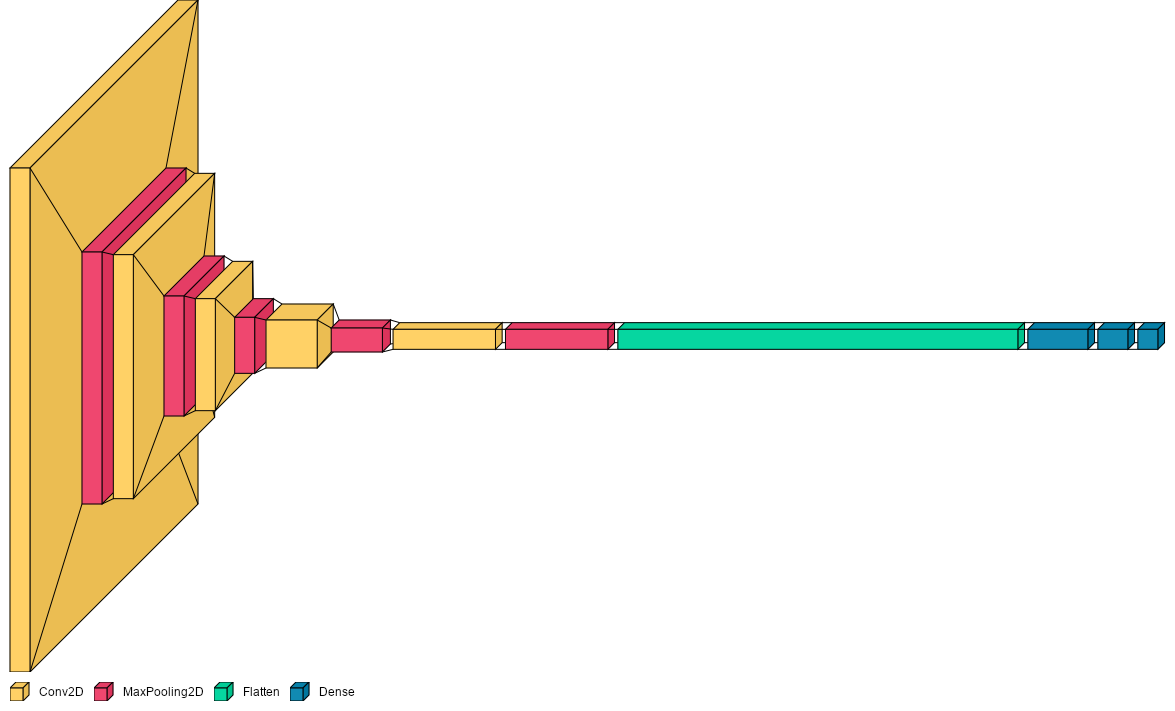

In [74]:
CNN_8_model = CNN_8.fit(x_train, y_train, epochs=20,validation_data=(x_val,y_val),batch_size=64)

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_8, legend=True, font=font)

In [ ]:
# Graph loss, accuracy for training and validation history
acc = CNN_5_model.history['accuracy']
val_acc = CNN_5_model.history['val_accuracy']

loss = CNN_5_model.history['loss']
val_loss = CNN_5_model.history['val_loss']

epochs=10
epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, 'b*', label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc,'g', label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b*',label='Training Loss')
plt.plot(epochs_range, val_loss,'g', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Model Transfer Learning

In [8]:
base = Xception(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_1 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         #NN_transfer_1.add(Dropout(.05))
                         Dense(1, activation='sigmoid')])

NN_transfer_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_transfer_1.summary()
NN_transfer_1_model = NN_transfer_1.fit(x_train, y_train, epochs=30, verbose=1,validation_data=(x_val,y_val), 
callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models_base/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 500)               16384500  
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 37,246,481
Trainable params: 16,385,001
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/30
104/104 [==============================] - ETA: 0s - loss: 15.4600 - accuracy: 0.6206

C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


104/104 [==============================] - 97s 895ms/step - loss: 15.4600 - accuracy: 0.6206 - val_loss: 1.4613 - val_accuracy: 0.7119
Epoch 2/30
104/104 [==============================] - 95s 914ms/step - loss: 0.6926 - accuracy: 0.7749 - val_loss: 0.6531 - val_accuracy: 0.7603
Epoch 3/30
104/104 [==============================] - 99s 950ms/step - loss: 0.5641 - accuracy: 0.7961 - val_loss: 0.9219 - val_accuracy: 0.7409
Epoch 4/30
104/104 [==============================] - 93s 894ms/step - loss: 0.6924 - accuracy: 0.7864 - val_loss: 0.7749 - val_accuracy: 0.7337
Epoch 5/30
104/104 [==============================] - 92s 886ms/step - loss: 0.3620 - accuracy: 0.8530 - val_loss: 1.4074 - val_accuracy: 0.6538
Epoch 6/30
104/104 [==============================] - 90s 864ms/step - loss: 0.3429 - accuracy: 0.8644 - val_loss: 0.7498 - val_accuracy: 0.7651
Epoch 7/30
104/104 [==============================] - 88s 846ms/step - loss: 0.3109 - accuracy: 0.8784 - val_loss: 0.6923 - val_accuracy: 0.

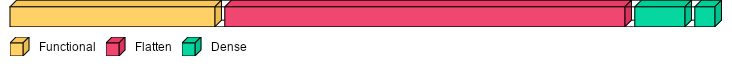

In [9]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_1, legend=True, font=font)

In [10]:
keras2ascii(NN_transfer_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
          Functional   ????? -------------------  20861480    56.0%
                       #####      4    4 2048
             Flatten   ||||| -------------------         0     0.0%
                       #####       32768
               Dense   XXXXX -------------------  16384500    44.0%
                relu   #####         500
               Dense   XXXXX -------------------       501     0.0%
             sigmoid   #####           1


In [13]:
print("[INFO] saving traffic detector model...")
base.save("Traffic-Accidents-Detection-base1.model", save_format="h5")

[INFO] saving traffic detector model...


In [18]:
base2 = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base2.layers:
    layer.trainable = False  

NN_transfer_2 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base2,
                         Flatten(),
                         Dense(400, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_2_model = NN_transfer_2.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val,y_val),callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base2/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

Epoch 1/10
104/104 [==============================] - 185s 2s/step - loss: 2.6086 - accuracy: 0.8070 - val_loss: 0.2888 - val_accuracy: 0.8717
Epoch 2/10
104/104 [==============================] - 193s 2s/step - loss: 0.1886 - accuracy: 0.9074 - val_loss: 0.3154 - val_accuracy: 0.8789
Epoch 3/10
104/104 [==============================] - 200s 2s/step - loss: 0.1455 - accuracy: 0.9425 - val_loss: 0.2925 - val_accuracy: 0.8814
Epoch 4/10
104/104 [==============================] - 192s 2s/step - loss: 0.0932 - accuracy: 0.9613 - val_loss: 0.4021 - val_accuracy: 0.8717
Epoch 5/10
104/104 [==============================] - 230s 2s/step - loss: 0.0684 - accuracy: 0.9710 - val_loss: 0.3262 - val_accuracy: 0.8886
Epoch 6/10
104/104 [==============================] - 202s 2s/step - loss: 0.0597 - accuracy: 0.9746 - val_loss: 0.3045 - val_accuracy: 0.9031
Epoch 7/10
104/104 [==============================] - 192s 2s/step - loss: 0.0522 - accuracy: 0.9782 - val_loss: 0.3174 - val_accuracy: 0.9080

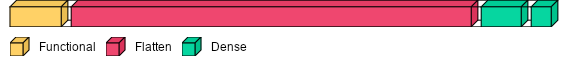

In [19]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_2, legend=True, font=font)

In [20]:
keras2ascii(NN_transfer_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
          Functional   ????? -------------------  14714688    81.8%
                       #####      4    4  512
             Flatten   ||||| -------------------         0     0.0%
                       #####        8192
               Dense   XXXXX -------------------   3277200    18.2%
                relu   #####         400
               Dense   XXXXX -------------------       401     0.0%
             sigmoid   #####           1


In [32]:
print("[INFO] saving traffic detector model...")
base2.save("Traffic-Accidents-Detection-base2.model", save_format="h5")

[INFO] saving traffic detector model...


In [83]:
base3 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

# Freeze convolutional layers
for layer in base3.layers:
    layer.trainable = False  

NN_transfer_3 = Sequential(
                        [InputLayer(input_shape=x_train.shape[1:]),base3,
                         Flatten(),  # should be fine , or add layers
                         Dense(64, activation='relu'),   
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(1, activation='sigmoid')]
                       )

NN_transfer_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
base3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [84]:
NN_transfer_3_model = NN_transfer_3.fit(x_train, y_train, validation_data=(x_val,y_val),verbose=1,epochs=10,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base3/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

Epoch 1/15
104/104 [==============================] - 221s 2s/step - loss: 0.8394 - accuracy: 0.7949 - val_loss: 0.4005 - val_accuracy: 0.8305
Epoch 2/15
104/104 [==============================] - 230s 2s/step - loss: 0.2493 - accuracy: 0.9092 - val_loss: 0.4084 - val_accuracy: 0.8741
Epoch 3/15
104/104 [==============================] - 223s 2s/step - loss: 0.1347 - accuracy: 0.9519 - val_loss: 0.3649 - val_accuracy: 0.8838
Epoch 4/15
104/104 [==============================] - 222s 2s/step - loss: 0.0836 - accuracy: 0.9694 - val_loss: 0.4380 - val_accuracy: 0.8692
Epoch 5/15
104/104 [==============================] - 212s 2s/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.3978 - val_accuracy: 0.8765
Epoch 6/15
104/104 [==============================] - 221s 2s/step - loss: 0.0840 - accuracy: 0.9749 - val_loss: 0.4224 - val_accuracy: 0.8765
Epoch 7/15
104/104 [==============================] - 223s 2s/step - loss: 0.0767 - accuracy: 0.9785 - val_loss: 0.4301 - val_accuracy: 0.8862

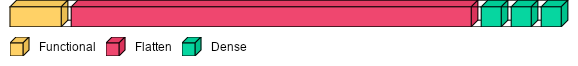

In [100]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_3, legend=True, font=font)

In [85]:
print("[INFO] saving traffic detector model...")
base3.save("Traffic-Accidents-Detection-base3.model", save_format="h5")

[INFO] saving traffic detector model...


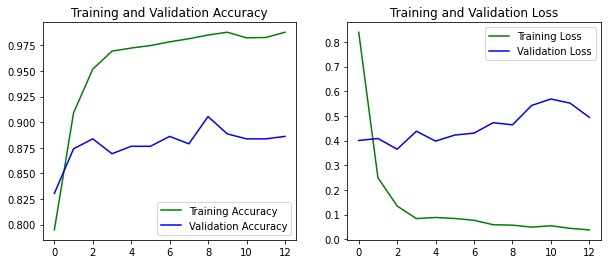

In [103]:
# Draw the best model 
acc = NN_transfer_3_model.history['accuracy']
val_acc = NN_transfer_3_model.history['val_accuracy']

loss = NN_transfer_3_model.history['loss']
val_loss = NN_transfer_3_model.history['val_loss']

epochs=13
epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy', color = 'green') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color='blue')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss',color='blue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [86]:
base4 = MobileNet(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base4.layers:
    layer.trainable = False  

NN_transfer_4 = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base4,
                         Flatten(),
                         Dense(600, activation='relu'),
                         Dense(300, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
base4.summary()
NN_transfer_4_model = NN_transfer_4.fit(x_train, y_train, epochs=30, validation_data=(x_val,y_val), verbose=1,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base4/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

Epoch 1/15
104/104 [==============================] - 56s 472ms/step - loss: 1.3314 - accuracy: 0.7056 - val_loss: 0.4356 - val_accuracy: 0.8039
Epoch 2/15
104/104 [==============================] - 53s 516ms/step - loss: 0.3422 - accuracy: 0.8496 - val_loss: 0.6146 - val_accuracy: 0.7482
Epoch 3/15
104/104 [==============================] - 52s 502ms/step - loss: 0.2182 - accuracy: 0.9059 - val_loss: 0.4254 - val_accuracy: 0.8111
Epoch 4/15
104/104 [==============================] - 47s 450ms/step - loss: 0.1213 - accuracy: 0.9519 - val_loss: 0.5075 - val_accuracy: 0.8184
Epoch 5/15
104/104 [==============================] - 49s 475ms/step - loss: 0.1021 - accuracy: 0.9619 - val_loss: 0.5476 - val_accuracy: 0.8087
Epoch 6/15
104/104 [==============================] - 45s 434ms/step - loss: 0.1334 - accuracy: 0.9437 - val_loss: 0.6838 - val_accuracy: 0.8160
Epoch 7/15
104/104 [==============================] - 48s 459ms/step - loss: 0.0733 - accuracy: 0.9731 - val_loss: 0.7030 - val_ac

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_4, legend=True, font=font)

In [90]:
base4 = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)) 
 
for layer in base4.layers:
    layer.trainable = False    

x = base4.output
x = Flatten()(x) 
x = Dense(500, activation='relu')(x) 
predictions = Dense(1, activation='sigmoid')(x) 

base4 = Model(inputs=base4.input, outputs=predictions)
base4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_32[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [92]:
base4.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=30,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base4/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

Epoch 1/10
104/104 [==============================] - 53s 437ms/step - loss: 0.6363 - accuracy: 0.6865 - val_loss: 0.5260 - val_accuracy: 0.7288
Epoch 2/10
104/104 [==============================] - 49s 474ms/step - loss: 0.3960 - accuracy: 0.8160 - val_loss: 0.5304 - val_accuracy: 0.7579
Epoch 3/10
104/104 [==============================] - 44s 424ms/step - loss: 0.3671 - accuracy: 0.8309 - val_loss: 0.5284 - val_accuracy: 0.7579
Epoch 4/10
104/104 [==============================] - 43s 418ms/step - loss: 0.2633 - accuracy: 0.8923 - val_loss: 0.6264 - val_accuracy: 0.7506
Epoch 5/10
104/104 [==============================] - 43s 420ms/step - loss: 0.2345 - accuracy: 0.9044 - val_loss: 0.4476 - val_accuracy: 0.8160
Epoch 6/10
104/104 [==============================] - 44s 428ms/step - loss: 0.1733 - accuracy: 0.9283 - val_loss: 0.5023 - val_accuracy: 0.7966
Epoch 7/10
104/104 [==============================] - 40s 391ms/step - loss: 0.1437 - accuracy: 0.9461 - val_loss: 0.6473 - val_ac

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(base4, legend=True, font=font)

In [93]:
base5 = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

# Freeze convolutional layers
for layer in base5.layers:
    layer.trainable = False  

NN_transfer_5 = Sequential(
                        [InputLayer(input_shape=(128,128,3)),base5,
                         Flatten(),  # should be fine , or add layers
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(1, activation='sigmoid')]
                       )

NN_transfer_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
base5.summary()
NN_transfer_5_model = NN_transfer_5.fit(x_train, y_train, epochs=30, validation_data=(x_val,y_val), verbose=1,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base5/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

80150528/80134624 [==============================] - 51s 1us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                             

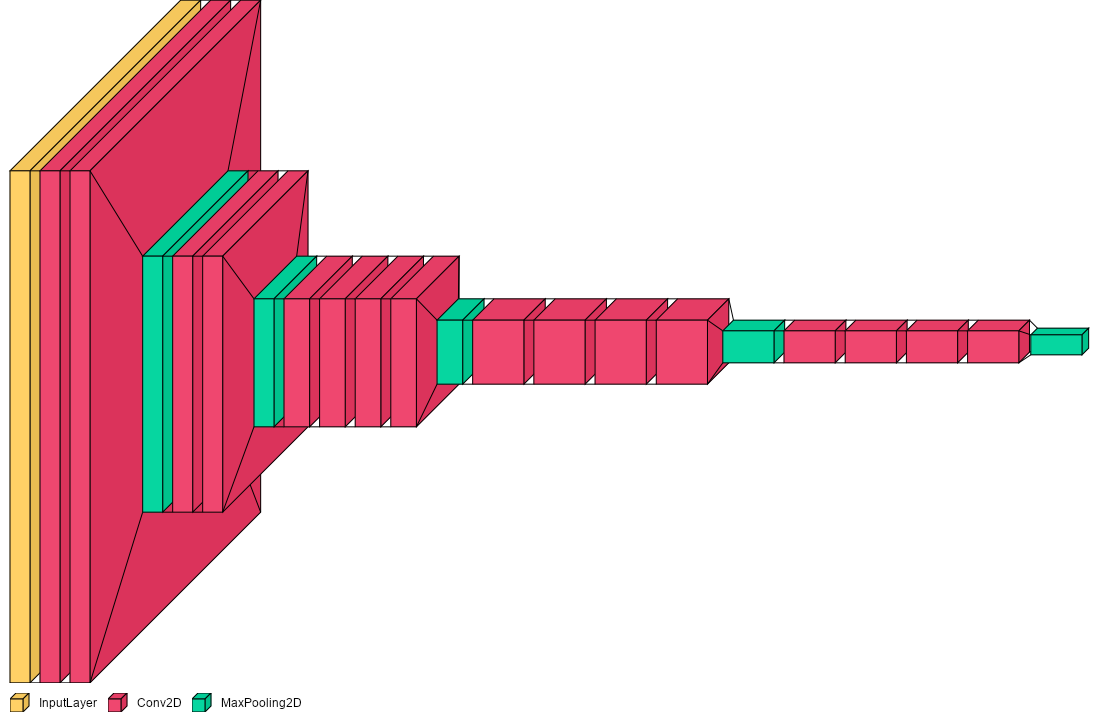

In [227]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(base5, legend=True, font=font)

In [228]:
print("[INFO] saving traffic detector model...")
base5.save("Traffic-Accidents-Detection-base5.model", save_format="h5")

[INFO] saving traffic detector model...


In [235]:
NN_transfer_5.save("NN_transfer_5_Final_Model")

INFO:tensorflow:Assets written to: NN_transfer_5_Final_Model\assets


In [96]:
base6 = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

# Freeze convolutional layers
for layer in base6.layers:
    layer.trainable = False  

NN_transfer_6 = Sequential(
                        [InputLayer(input_shape=(128,128,3)),base6,
                         Flatten(),  
                         Dense(512, activation='relu'),   
                         Dense(256, activation='relu'),
                         Dense(128, activation='relu'),   
                         Dense(64, activation='relu'),   
                         Dense(1, activation='sigmoid')]
                       )

NN_transfer_6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
base6.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_141 (Conv2D)            (None, 63, 63, 32)   864         ['input_37[0][0]']               
                                                                                                  
 batch_normalization_105 (Batch  (None, 63, 63, 32)  96          ['conv2d_141[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [97]:
NN_transfer_5_model = NN_transfer_6.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=20,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base5/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

Epoch 1/10
104/104 [==============================] - 73s 605ms/step - loss: 27.9024 - accuracy: 0.5894 - val_loss: 2.7085 - val_accuracy: 0.6368
Epoch 2/10
104/104 [==============================] - 63s 608ms/step - loss: 2.0045 - accuracy: 0.6684 - val_loss: 1.1895 - val_accuracy: 0.7022
Epoch 3/10
104/104 [==============================] - 63s 606ms/step - loss: 1.1626 - accuracy: 0.7038 - val_loss: 1.7214 - val_accuracy: 0.6077
Epoch 4/10
104/104 [==============================] - 62s 599ms/step - loss: 0.8285 - accuracy: 0.7174 - val_loss: 0.7906 - val_accuracy: 0.7240
Epoch 5/10
104/104 [==============================] - 63s 611ms/step - loss: 1.2331 - accuracy: 0.6802 - val_loss: 0.6683 - val_accuracy: 0.7458
Epoch 6/10
104/104 [==============================] - 62s 597ms/step - loss: 0.6802 - accuracy: 0.7328 - val_loss: 0.8231 - val_accuracy: 0.6707
Epoch 7/10
104/104 [==============================] - 60s 578ms/step - loss: 0.5945 - accuracy: 0.7510 - val_loss: 1.6017 - val_a

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(base6, legend=True, font=font)

# Augmentation Data
To reach to a better results we need to augmentate the train set

In [35]:
!pip install split-folders

In [39]:
import ctypes
k32 = ctypes.windll.kernel32
wow64 = ctypes.c_long( 0 )
k32.Wow64DisableWow64FsRedirection( ctypes.byref(wow64) )
    # ... do stuff with real files ...
k32.Wow64RevertWow64FsRedirection( wow64 )


0

In [54]:
# I made this for TB vs Normal image datasets by improving above code
## import libraries

import os
import numpy as np
import shutil
import random

# creating train / val /test
root_dir = './NewData'
new_root = './AugData'
classes = ['./accident', './non accident']

for cls in classes:
    os.makedirs(root_dir + new_root+ 'train/' + cls)
    os.makedirs(root_dir +new_root +'val/' + cls)
    os.makedirs(root_dir +new_root + 'test/' + cls)

In [45]:
## creating partition of the data after shuffeling
for cls in classes:
    src = root_dir + cls # folder to copy images from
    print(src)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

    ## here 0.75 = training ratio , (0.95-0.75) = validation ratio , (1-0.95) =  
    ##training ratio  
    train_FileNames,val_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.75),int(len(allFileNames)*0.95)])

    # #Converting file names from array to list

    train_FileNames = [src+'/'+ name for name in train_FileNames]
    val_FileNames = [src+'/' + name for name in val_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Training : '+ cls + ' '+str(len(train_FileNames)))
    print('Validation : '+ cls + ' ' +str(len(val_FileNames)))
    print('Testing : '+ cls + ' '+str(len(test_FileNames)))
    
    ## Copy pasting images to target directory

    for name in train_FileNames:
        shutil.copy(name, root_dir + new_root+'train/'+cls )


    for name in val_FileNames:
        shutil.copy(name, root_dir +new_root+'val/'+cls )


    for name in test_FileNames:
        shutil.copy(name,root_dir + new_root+'test/'+cls )

./NewData./accident
Total images  : ./accident 2105
Training : ./accident 1578
Validation : ./accident 421
Testing : ./accident 106
./NewData./non accident
Total images  : ./non accident 2027
Training : ./non accident 1520
Validation : ./non accident 405
Testing : ./non accident 102


# Prepare and Read The Train Set only

In [48]:
list_images_accident_aug = []
name_accident_aug= []
for dirname, _, filenames in os.walk('./NewData/AugDatatrain/accident'):
    for filename in filenames:
        list_images_accident_aug.append(os.path.join(dirname, filename))
        name_accident_aug.append(filename)
list_images_accident_aug

['./NewData/AugDatatrain/accident\\acc1 (13).jpg',
 './NewData/AugDatatrain/accident\\acc1 (14).jpg',
 './NewData/AugDatatrain/accident\\acc1 (2).jpg',
 './NewData/AugDatatrain/accident\\acc1 (3).jpg',
 './NewData/AugDatatrain/accident\\acc1 (4).jpg',
 './NewData/AugDatatrain/accident\\acc1 (5).jpg',
 './NewData/AugDatatrain/accident\\acc1 (6).jpg',
 './NewData/AugDatatrain/accident\\acc1 (7).jpg',
 './NewData/AugDatatrain/accident\\accident (1).jpg',
 './NewData/AugDatatrain/accident\\accident (10).jpg',
 './NewData/AugDatatrain/accident\\accident (1000).jpg',
 './NewData/AugDatatrain/accident\\accident (1001).jpg',
 './NewData/AugDatatrain/accident\\accident (1002).jpg',
 './NewData/AugDatatrain/accident\\accident (1003).jpg',
 './NewData/AugDatatrain/accident\\accident (1005).jpg',
 './NewData/AugDatatrain/accident\\accident (1006).jpg',
 './NewData/AugDatatrain/accident\\accident (1007).jpg',
 './NewData/AugDatatrain/accident\\accident (1008).jpg',
 './NewData/AugDatatrain/accident

In [50]:
open_file = open("list_images_accident_aug.txt", "wb")
pickle.dump(list_images_accident_aug, open_file)
open_file.close()

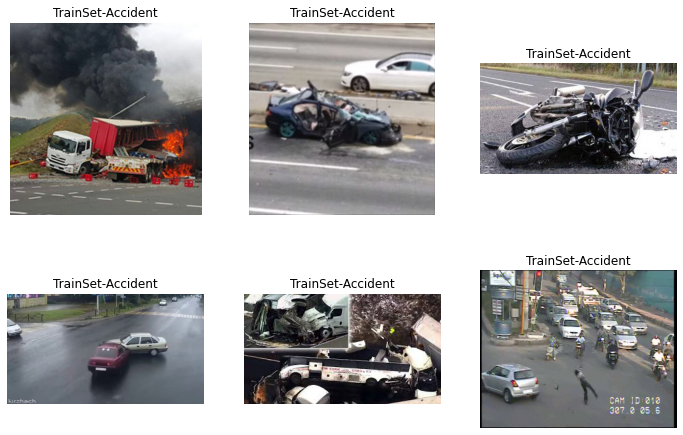

In [57]:
with open("list_images_accident_aug.txt", "rb") as fp:
    accidents_aug = pickle.load(fp)
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,6):
    n = random.randint(0,len(accidents_aug))
    ran_num.append(n)
for i in range(6):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(accidents_aug[ran_num[i]]))
    plt.title("TrainSet-Accident")
    plt.axis("off")

In [53]:
df_images_accident_aug = pd.DataFrame()
df_images_accident_aug["File_Name"] = name_accident_aug
df_images_accident_aug["Class"] = "Accident"
df_images_accident_aug

,File_Name,Class
0,acc1 (13).jpg,Accident
1,acc1 (14).jpg,Accident
2,acc1 (2).jpg,Accident
3,acc1 (3).jpg,Accident
4,acc1 (4).jpg,Accident
...,...,...
1573,test_41.jpg,Accident
1574,test_42.jpg,Accident
1575,test_43.jpg,Accident
1576,test_44.jpg,Accident


In [49]:
list_images_NonAccident_aug = []
name_NonAccident_aug= []
for dirname, _, filenames in os.walk('./NewData/AugDatatrain/non accident'):
    for filename in filenames:
        list_images_NonAccident_aug.append(os.path.join(dirname, filename))
        name_NonAccident_aug.append(filename)
list_images_NonAccident_aug

['./NewData/AugDatatrain/non accident\\5_10.jpg',
 './NewData/AugDatatrain/non accident\\5_12.jpg',
 './NewData/AugDatatrain/non accident\\5_14.jpg',
 './NewData/AugDatatrain/non accident\\5_15.jpg',
 './NewData/AugDatatrain/non accident\\5_22.jpg',
 './NewData/AugDatatrain/non accident\\5_23.jpg',
 './NewData/AugDatatrain/non accident\\5_24.jpg',
 './NewData/AugDatatrain/non accident\\5_25.jpg',
 './NewData/AugDatatrain/non accident\\5_26.jpg',
 './NewData/AugDatatrain/non accident\\5_27.jpg',
 './NewData/AugDatatrain/non accident\\5_28.jpg',
 './NewData/AugDatatrain/non accident\\5_6.jpg',
 './NewData/AugDatatrain/non accident\\5_7.jpg',
 './NewData/AugDatatrain/non accident\\5_8.jpg',
 './NewData/AugDatatrain/non accident\\no_accident (1).jpg',
 './NewData/AugDatatrain/non accident\\no_accident (10).jpg',
 './NewData/AugDatatrain/non accident\\no_accident (1000).jpg',
 './NewData/AugDatatrain/non accident\\no_accident (1002).jpg',
 './NewData/AugDatatrain/non accident\\no_accident (

In [55]:
open_file = open("list_images_NonAccident_aug.txt", "wb")
pickle.dump(list_images_NonAccident_aug, open_file)
open_file.close()

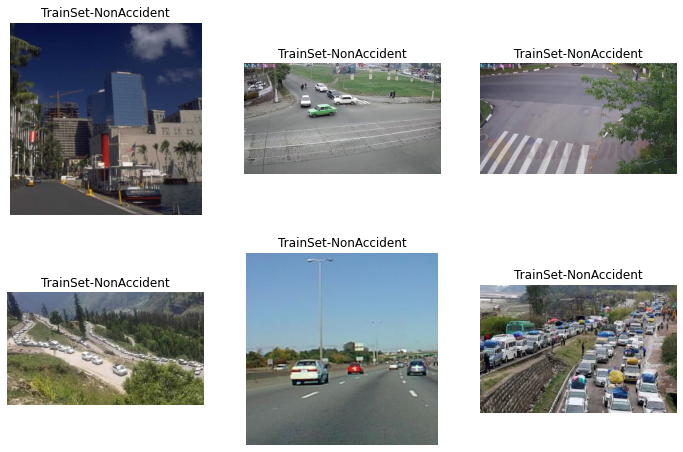

In [58]:
with open("list_images_NonAccident_aug.txt", "rb") as fp:
    NonAccidents_aug = pickle.load(fp)
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,6):
    n = random.randint(0,len(NonAccidents_aug))
    ran_num.append(n)
for i in range(6):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(NonAccidents_aug[ran_num[i]]))
    plt.title("TrainSet-NonAccident")
    plt.axis("off")

In [60]:
df_images_NonAccident_aug = pd.DataFrame()
df_images_NonAccident_aug["File_Name"] = name_NonAccident_aug
df_images_NonAccident_aug["Class"] = "NonAccident"
df_images_NonAccident_aug

,File_Name,Class
0,5_10.jpg,NonAccident
1,5_12.jpg,NonAccident
2,5_14.jpg,NonAccident
3,5_15.jpg,NonAccident
4,5_22.jpg,NonAccident
...,...,...
1515,test_46.jpg,NonAccident
1516,test_5.jpg,NonAccident
1517,test_7.jpg,NonAccident
1518,test_8.jpg,NonAccident


In [61]:
df_all_train_images = pd.concat([df_images_NonAccident_aug, df_images_accident_aug], ignore_index=True)
df_all_train_images

,File_Name,Class
0,5_10.jpg,NonAccident
1,5_12.jpg,NonAccident
2,5_14.jpg,NonAccident
3,5_15.jpg,NonAccident
4,5_22.jpg,NonAccident
...,...,...
3093,test_41.jpg,Accident
3094,test_42.jpg,Accident
3095,test_43.jpg,Accident
3096,test_44.jpg,Accident


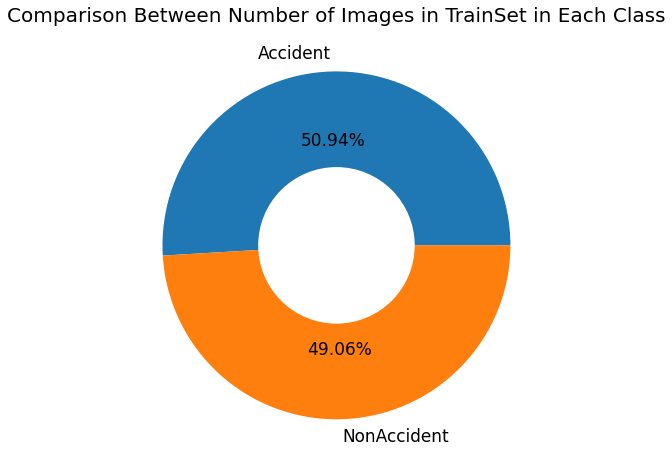

In [63]:
plt.figure(figsize=(8,8))
plt.pie(x=df_all_train_images['Class'].value_counts(),labels=list(df_all_train_images['Class'].value_counts().index)
        ,autopct='%.2f%%',textprops={'fontsize': 17})

plt.title('Comparison Between Number of Images in TrainSet in Each Class',fontdict={'fontsize':20})
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

# Augmentation for Train Set only

In [64]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

In [66]:
Sample_list_images_no_accident = random.sample(list_images_NonAccident_aug, 422)
Sample_list_images_accident = random.sample(list_images_accident_aug, 422)

In [67]:
# Augmentate first accident folder 
for path in Sample_list_images_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./NewData/AugDatatrain/Accident_aug', save_prefix='accident_aug', save_format='jpg'):
        i += 1
        if i > 4:
            break   

In [68]:
# Augmentate second non accident folder 
for path in Sample_list_images_no_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./NewData/AugDatatrain/NonAccident_aug', save_prefix='non_accident_aug', save_format='jpg'):
        i += 1
        if i > 4:
            break

In [219]:
read_list_images_accident_Aug = []
read_name_accident_Aug= []
for dirname, _, filenames in os.walk('./NewData/AugDatatrain/accident_aug'):
    for filename in filenames:
        read_list_images_accident_Aug.append(os.path.join(dirname, filename))
        read_name_accident_Aug.append(filename)

new_df_list_images_accident_Aug = pd.DataFrame()
new_df_list_images_accident_Aug["File_Name"] = read_name_accident_Aug
new_df_list_images_accident_Aug["Class"] = "Accident"
new_df_list_images_accident_Aug

,File_Name,Class
0,accident_aug_0_1001.jpg,Accident
1,accident_aug_0_1008.jpg,Accident
2,accident_aug_0_1018.jpg,Accident
3,accident_aug_0_1019.jpg,Accident
4,accident_aug_0_102.jpg,Accident
...,...,...
1892,accident_aug_0_9965.jpg,Accident
1893,accident_aug_0_9970.jpg,Accident
1894,accident_aug_0_9980.jpg,Accident
1895,accident_aug_0_9986.jpg,Accident


In [220]:
read_list_images_NonAccident_Aug = []
read_name_NonAccident_Aug= []
for dirname, _, filenames in os.walk('./NewData/AugDatatrain/NonAccident_aug'):
    for filename in filenames:
        read_list_images_NonAccident_Aug.append(os.path.join(dirname, filename))
        read_name_NonAccident_Aug.append(filename)

new_df_list_images_NonAccident_Aug = pd.DataFrame()
new_df_list_images_NonAccident_Aug["File_Name"] = read_name_NonAccident_Aug
new_df_list_images_NonAccident_Aug["Class"] = "NonAccident"
new_df_list_images_NonAccident_Aug

,File_Name,Class
0,non_accident_aug_0_10.jpg,NonAccident
1,non_accident_aug_0_100.jpg,NonAccident
2,non_accident_aug_0_1007.jpg,NonAccident
3,non_accident_aug_0_1015.jpg,NonAccident
4,non_accident_aug_0_1019.jpg,NonAccident
...,...,...
1910,non_accident_aug_0_9965.jpg,NonAccident
1911,non_accident_aug_0_9969.jpg,NonAccident
1912,non_accident_aug_0_9975.jpg,NonAccident
1913,non_accident_aug_0_998.jpg,NonAccident


In [221]:
df_all_images_Aug = pd.concat([new_df_list_images_NonAccident_Aug, new_df_list_images_accident_Aug], ignore_index=True)
df_all_images_Aug

,File_Name,Class
0,non_accident_aug_0_10.jpg,NonAccident
1,non_accident_aug_0_100.jpg,NonAccident
2,non_accident_aug_0_1007.jpg,NonAccident
3,non_accident_aug_0_1015.jpg,NonAccident
4,non_accident_aug_0_1019.jpg,NonAccident
...,...,...
3807,accident_aug_0_9965.jpg,Accident
3808,accident_aug_0_9970.jpg,Accident
3809,accident_aug_0_9980.jpg,Accident
3810,accident_aug_0_9986.jpg,Accident


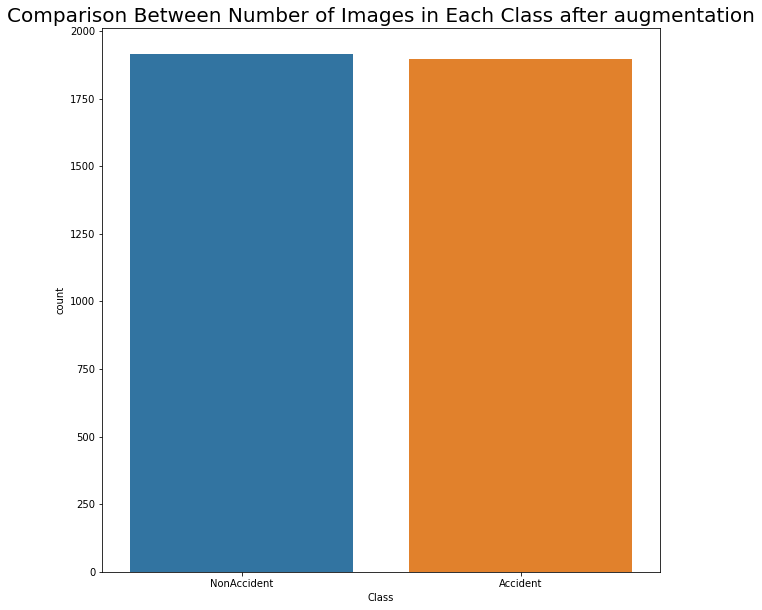

In [222]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images_Aug)
plt.title('Comparison Between Number of Images in Each Class after augmentation',fontdict={'fontsize':20});

In [206]:
## Defining batch specfications
batch_size = 2000
img_height = 128
img_width = 128

In [223]:
## Generated Training Augmentations
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =  train_datagen.flow_from_directory(
    './Aug_train',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 3812 images belonging to 2 classes.


In [224]:
## Generated ValidationSet
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator =  val_datagen.flow_from_directory(
    './NewData/AugDataval',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 826 images belonging to 2 classes.


In [209]:
## Generated TestSet
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './NewData/AugDatatest',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 208 images belonging to 2 classes.


# Prepare Augmentated Images for Modeling

In [210]:
from PIL import Image

In [225]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    x = image.img_to_array(img)
    return x

In [226]:
images_Aug = []
labels_Aug = []

directory = os.fsencode('./NewData/AugDatatrain')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'./NewData/AugDatatrain/{label}'):
        img_name = os.fsdecode(img)
        images_Aug.append(prepare_image(f'./NewData/AugDatatrain/{label}/{img_name}'))
        labels_Aug.append(label)

In [213]:
label_0_1_Aug = [int(labels_Aug[w].replace('NonAccident_aug', "0").replace("Accident_aug",'1')) for w in range(len(labels_Aug))]
label_0_1_Aug

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [215]:
len(label_0_1_Aug)

3812

In [165]:
X_digits_Aug, Y_digits_Aug = images_Aug, label_0_1_Aug

In [166]:
X_Aug = np.array(X_digits_Aug)

In [167]:
open_file = open("X_128x128_Aug.txt", "wb")
pickle.dump(X_Aug, open_file)
open_file.close()

In [168]:
Y_Aug = np.array(Y_digits_Aug)

In [169]:
open_file = open("Y_128x128_Aug.txt", "wb")
pickle.dump(Y_Aug, open_file)
open_file.close()

In [170]:
with open("X_128x128_Aug.txt", "rb") as fp: 
    X_Aug = pickle.load(fp)

In [171]:
with open("Y_128x128_Aug.txt", "rb") as fp: 
    Y_Aug = pickle.load(fp)

In [172]:
# Create the x & y for all sets
x_train, y_train = X_Aug,Y_Aug

In [179]:
train_generator.class_indices

{'Accident_aug': 0, 'NonAccident_aug': 1}

In [188]:
x_val, y_val = next(val_generator)
x_val.shape, y_val.shape 

((826, 128, 128, 3), (826,))

In [192]:
x_test, y_test = next(test_generator)
x_test.shape, y_test.shape

((208, 128, 128, 3), (208,))

In [193]:
# Checking the shapes of the datasets
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_val = x_val.shape[0]
m_test = x_test.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

Number of training samples: 3812
Number of validation samples: 826
Number of testing samples: 208
train_images shape: (3812, 128, 128, 3)
train_labels shape: (3812,)
val_images shape: (826, 128, 128, 3)
val_labels shape: (826,)
test_images shape: (208, 128, 128, 3)
test_labels shape: (208,)


Epoch 1/8
120/120 [==============================] - 81s 676ms/step - loss: 0.7088 - accuracy: 0.6180 - val_loss: 0.7604 - val_accuracy: 0.4903
Epoch 2/8
120/120 [==============================] - 80s 669ms/step - loss: 0.5837 - accuracy: 0.6758 - val_loss: 0.7101 - val_accuracy: 0.5097
Epoch 3/8
120/120 [==============================] - 75s 621ms/step - loss: 0.5477 - accuracy: 0.7188 - val_loss: 0.6975 - val_accuracy: 0.4903
Epoch 4/8
120/120 [==============================] - 77s 643ms/step - loss: 0.4949 - accuracy: 0.7539 - val_loss: 0.7652 - val_accuracy: 0.4903
Epoch 5/8
120/120 [==============================] - 78s 650ms/step - loss: 0.3917 - accuracy: 0.8200 - val_loss: 0.9559 - val_accuracy: 0.5097
Epoch 6/8
120/120 [==============================] - 84s 698ms/step - loss: 0.2911 - accuracy: 0.8783 - val_loss: 0.9602 - val_accuracy: 0.5097
Epoch 7/8
120/120 [==============================] - 83s 689ms/step - loss: 0.1885 - accuracy: 0.9276 - val_loss: 1.0741 - val_accuracy:

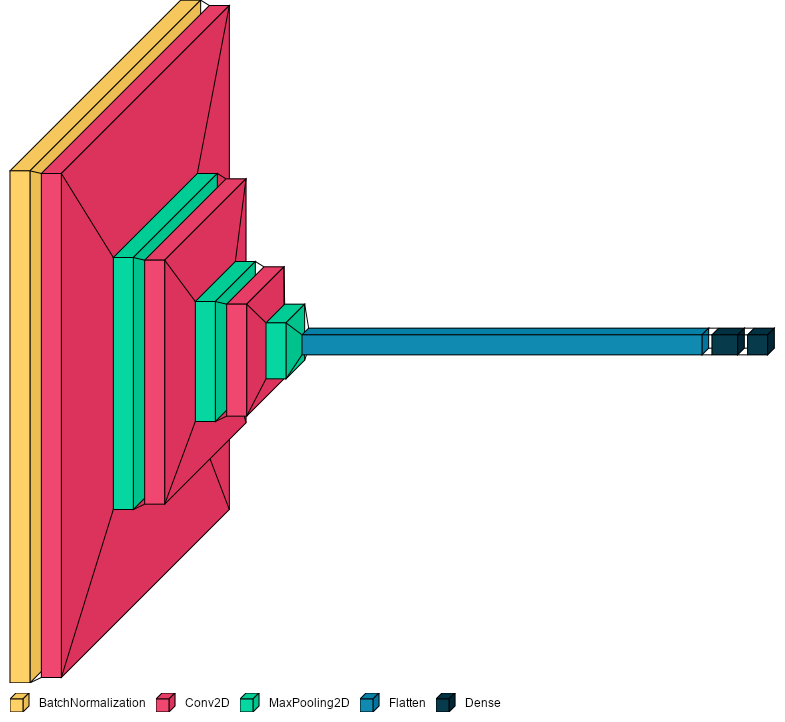

In [196]:
CNN_6 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense(1, activation= 'sigmoid') #Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
CNN_6.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              steps_per_execution = 50,
              loss='binary_crossentropy', metrics=['accuracy'])
CNN_6_model = CNN_6.fit(x_train, y_train, epochs=8,validation_data=(x_val,y_val),batch_size=32, verbose=1,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base6/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_6, legend=True, font=font)

In [ ]:
base7 = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

# Freeze convolutional layers
for layer in base5.layers:
    layer.trainable = False  

NN_transfer_7 = Sequential(
                        [InputLayer(input_shape=(128,128,3)),base7,
                         Flatten(),  # should be fine , or add layers
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(1, activation='sigmoid')]
                       )

NN_transfer_7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
base7.summary()
NN_transfer_7_model = NN_transfer_7.fit(x_train, y_train, epochs=5, validation_data=(x_val,y_val), verbose=1,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base7/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

In [ ]:
base8 = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_8_Aug = Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         base8,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(1, activation='sigmoid')])

NN_transfer_8_Aug.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_8_model_Aug = NN_transfer_8_Aug.fit(x_train, y_train, epochs=5, verbose=1,validation_data=(x_val,y_val), verbose=1,callbacks=[
           keras.callbacks.ModelCheckpoint(
               'model_base8/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])

predict_x = NN_transfer_8_Aug.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_8_Aug.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

# Test The Best Model

In [251]:
best_model = NN_transfer_5

In [258]:
classes = ["Accident","No Accident"]

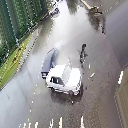

In [255]:
img = image.load_img(f"accident.jpg",target_size=(128,128))
img

In [259]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = best_model.predict([images])
ind = max(val).argmax()
print(classes[ind])

Accident


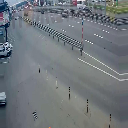

In [260]:
img = image.load_img(f"non accident.jpg",target_size=(128,128))
img

In [261]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = best_model.predict([images])
ind = max(val).argmax()
print(classes[ind])

Accident


# Deployment by OpenCV

In [26]:
!pip install opencv-python

In [27]:
import cv2
import numpy as np
from keras.models import load_model

In [269]:

model=load_model("./Traffic-Accidents-Detection-base5.model")

results={0:'Non accident',1:'Accident'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier('/Users/Mylab1/Desktop/T5/DeepLearning Project/haar/car_detection_in_traffic-master/cars.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        car_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(car_img,(125,125))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,125,125,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()